# Homework 1
Mya Schroder
Due: 2/8/2024

## PROBLEM 1

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def MSE_gradients(data:np.array, weights) -> (float, np.array):
    """
    @brief      Finds MSE and gradients of the data given the weights
    @param data      Array of tuples of any length Array of tuples [(x1, x2, ...,  y), (x1, x2, ..., y), ...]
    """

    gradients = np.zeros(len(weights))
    mse = 0
    len_data = len(data)

    for i in range(len_data):
        x = data[i][:-1]
        y = data[i][-1]

        error = weights[0] + np.dot(weights[1:], x) - y

        gradients[0] += 1/len_data * error 
        gradients[1:] += 1/len_data * error * x

        mse += error ** 2 / (2 * len_data)
        
        if (math.isinf(mse)):
            print("\n!!WARNING: MSE value was too large and overflowed!!")
            exit()

    return mse, gradients

def regression(data: [(float, ...)], learning_rate=0.001, iterations=1000) -> [float, ... ]:
    """
    @brief      Finds best fit line for data 
    @param data      Array of tuples of any length [(x,y, ...), (x,y, ...), ...]
    @param learning_rate    Learning rate (de)
    @param iterations       Number of iterations
    """
    len_weights = len(data[0])
    weights = np.zeros(len_weights)
    mse_list = np.array([])

    
    for i in range(iterations):
        mse, gradients = MSE_gradients(data, weights)
        mse_list = np.append(mse_list, mse)

        weights = weights - learning_rate * gradients

    return mse_list, weights


Final Training RMSE: 54.866486831173255
Test RMSE: 47.60374910869797


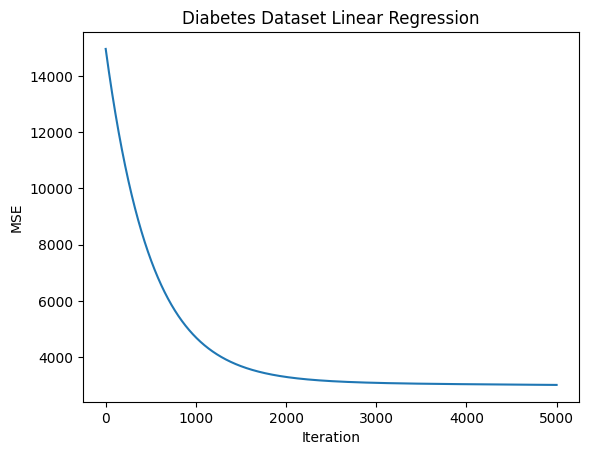

In [4]:
# Load Dataset
diabetes = datasets.load_diabetes()

# Split Dataset
train_x, test_x, train_y, test_y = train_test_split(diabetes.data,diabetes.target, test_size=0.2)
    # Original format of data x data [[x0, x1, x2, ... x9], [x0, x1, x2, ... x9]]
    # Original Format of data y data [...]

# Format train data
train_data = np.hstack((train_x, train_y.reshape(-1, 1)))
test_data = np.hstack((test_x, test_y.reshape(-1, 1)))

# Run Regression
mse_list, weights = regression(train_data, 0.001, 5000)
print("Final Training RMSE:", math.sqrt(mse_list[-1]))

mse, _ = MSE_gradients(test_data, weights)
print("Test RMSE:", math.sqrt(mse))


plt.plot(mse_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Diabetes Dataset Linear Regression')
plt.show()

## PROBLEM 3

In [38]:
def cross_entropy_gradients(data:np.array, weights) -> (float, np.array):
    """
    @brief      Finds Cross Entropy Error and gradients of the data given the weights
    @param data      Array of tuples of any length Array of tuples [(x1, x2, ...,  y), (x1, x2, ..., y), ...]
    """

    gradients = np.zeros(len(weights))
    total_error = 0
    len_data = len(data)
    epsilon = 1e-10 # prevents taking log of 0 (Used ChatGPT to diagnose issue)

    for i in range(len_data):
        x = data[i][:-1]
        y = data[i][-1]

        y_hat = 1 / (1 + math.e ** -(weights[0] + np.dot(weights[1:], x)))


        # Cross Entropy Error
        error = -y * math.log(y_hat + epsilon, 10) - (1 - y) * math.log(1-y_hat + epsilon, 10)  

        # Derivatives of Cross Entropy Loss over len_data
        gradients[0] += 1/len_data * (y_hat - y) 
        gradients[1:] += 1/len_data * (y_hat - y)  * x

        total_error += error / len_data
        
        if (math.isinf(total_error)):
            print("\n!!WARNING: Total error value was too large and overflowed!!")
            exit()

    return total_error, gradients



def regression(data: [(float, ...)], learning_rate=0.001, iterations=1000) -> [float, ... ]:
    """
    @brief      Finds best fit line for data 
    @param data      Array of tuples of any length [(x,y, ...), (x,y, ...), ...]
    @param learning_rate    Learning rate (de)
    @param iterations       Number of iterations
    """
    len_weights = len(data[0])
    weights = np.zeros(len_weights)

    
    for i in range(iterations):
        
        total_error, gradients = cross_entropy_gradients(data, weights)

        weights = weights - learning_rate * gradients

    return total_error, weights

In [39]:
# With skewed data
# Load data
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X_train = np.vstack((X[y == 1], X[y == 0][:1]))
y_train = np.hstack((y[y == 1], y[y == 0][:1]))
X_test = np.vstack((X[y == 1], X[y == 0][:10]))
y_test = np.hstack((y[y == 1], y[y == 0][:10]))

print("Number of benign (1) training samples:", np.sum(y_train == 1))
print("Number of training (0) training samples:", np.sum(y_train == 0))
print("Number of benign (1) testing samples:", np.sum(y_test == 1))
print("Number of training (0) testing samples:", np.sum(y_test == 0))

# Format train data
train_data = np.hstack((X_train, y_train.reshape(-1, 1)))
test_data = np.hstack((X_test, y_test.reshape(-1, 1)))

final_error, weights = regression(train_data, 0.01, 1000)

print(f'\nFinal Training Accuracy: {final_error:.6f}')
test_error, _ = cross_entropy_gradients(test_data, weights)
print(f'Test Accuracy: {test_error:.6f}')




Number of benign (1) training samples: 357
Number of training (0) training samples: 1
Number of benign (1) testing samples: 357
Number of training (0) testing samples: 10

Final Training Accuracy: -0.000000
Test Accuracy: 0.245232


In [41]:
# Without skewed Data

# Load data
bc = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

print("Number of benign (1) training samples:", np.sum(y_train == 1))
print("Number of training (0) training samples:", np.sum(y_train == 0))
print("Number of benign (1) testing samples:", np.sum(y_test == 1))
print("Number of training (0) testing samples:", np.sum(y_test == 0))

# Format train data
train_data = np.hstack((X_train, y_train.reshape(-1, 1)))
test_data = np.hstack((X_test, y_test.reshape(-1, 1)))

final_error, weights = regression(train_data, 0.5, 1000)

print(f'\nFinal Training Accuracy: {final_error:.6f}')
test_error, _ = cross_entropy_gradients(test_data, weights)
print(f'Test Accuracy: {test_error:.6f}')

Number of benign (1) training samples: 278
Number of training (0) training samples: 177
Number of benign (1) testing samples: 79
Number of training (0) testing samples: 35


/var/folders/pf/bh30_19d3qd8ptrbb2y_wn000000gp/T/ipykernel_35800/4225532375.py:16: RuntimeWarning: overflow encountered in scalar power
  y_hat = 1 / (1 + math.e ** -(weights[0] + np.dot(weights[1:], x)))



Final Training Accuracy: 0.901099
Test Accuracy: 0.789474


In [42]:
#Sklearn implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

# Load data
bc = datasets.load_breast_cancer()

#X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

X = bc.data
y = bc.target

X_train = np.vstack((X[y == 1], X[y == 0][:1]))
y_train = np.hstack((y[y == 1], y[y == 0][:1]))
X_test = np.vstack((X[y == 1], X[y == 0][:10]))
y_test = np.hstack((y[y == 1], y[y == 0][:10]))

print("Number of benign (1) training samples:", np.sum(y_train == 1))
print("Number of training (0) training samples:", np.sum(y_train == 0))
print("Number of benign (1) testing samples:", np.sum(y_test == 1))
print("Number of training (0) testing samples:", np.sum(y_test == 0))

# Format train data

classifier=LogisticRegression().fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.6f}')

Number of benign (1) training samples: 357
Number of training (0) training samples: 1
Number of benign (1) testing samples: 357
Number of training (0) testing samples: 10
Test Accuracy: 0.980926
